Exploratory warm-up:
1. Which product have the greatest prospect-to-customer ratio?

2. Which product have the greatest challenge with retention in the first 3 months of product use? Do you think the 3 month retention rates vary significantly across different product?

Meat of the problem:
3. We have a repertoire of tactics we can deploy to keep customers happy and engaged, but would like to be smart about who to target with what tactics when. Stakeholders in the customer care and marketing department come to you, asking for guidance. Can you slice and dice the data, with this question in mind, to uncover meaningful insights on the customer retention behavior, and make actionable recommendations accordingly? 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
customers = pd.read_csv('customers.csv')
quiz = pd.read_csv('quiz_sessions.csv') 

In [4]:
customers.head(5)

,customer_id,product_name,journey_length,currently_customer,customer age group at the point of sign up
0,445,product11,185.0,N,under 18
1,2831,product5,965.0,N,25-35
2,2834,product11,1032.0,N,25-35
3,2855,product5,8.0,N,25-35
4,2885,product5,45.0,N,25-35


In [5]:
quiz.head(5)

,customer_id,product_name,answer1,answer2,answer3,answer4,answer5,answer6,answer7,answer8,...,answer18,answer19,answer20,answer21,answer22,answer23,answer24,answer25,log_total_time,device
0,56006,product4,3.0,2,2.0,2,6,1.0,3.0,1.0,...,1.0,1.0,2.0,3.0,1.0,3.0,3.0,1.0,8.038644,NaN
1,56088,product4,4.0,1,1.0,5,3,1.0,1.0,4.0,...,1.0,1.0,4.0,1.0,1.0,4.0,4.0,1.0,7.294608,NaN
2,56107,product4,3.0,1,2.0,2,0,1.0,3.0,1.0,...,1.0,1.0,3.0,3.0,1.0,1.0,3.0,1.0,7.825903,NaN
3,56110,product4,4.0,3,1.0,1,0,1.0,3.0,1.0,...,3.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,7.326702,NaN
4,56162,product4,4.0,4,2.0,0,0,1.0,4.0,3.0,...,1.0,3.0,1.0,4.0,3.0,3.0,1.0,4.0,7.828100,NaN


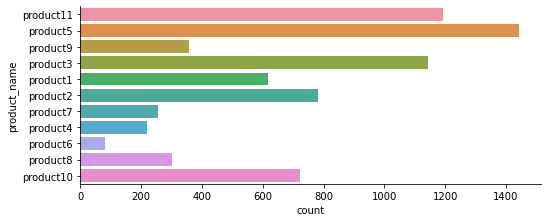

In [61]:
ax = sns.catplot(y="product_name", kind="count", data=customers, height=3, aspect=2.5, orient='h')

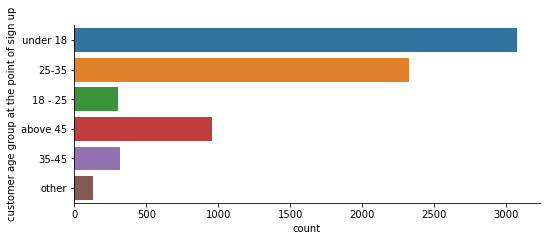

In [63]:
ax = sns.catplot(y="customer age group at the point of sign up", kind="count", data=customers, height=3, aspect=2.5, orient='h')

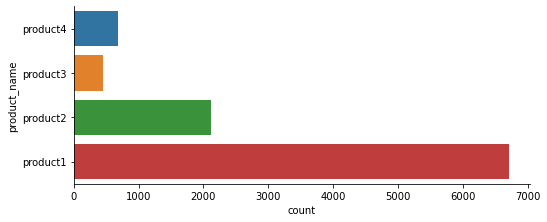

In [108]:
ax = sns.catplot(y="product_name", kind="count", data=quiz, height=3, aspect=2.5, orient='h')

## Which product have the greatest prospect-to-customer ratio?

In [120]:
quiz_n_by_product = quiz.groupby('product_name')['customer_id'].nunique().reset_index(drop=False).rename(columns={'customer_id': 'customer_cnt'}, inplace=False)

In [121]:
quiz_n_by_product

,product_name,customer_cnt
0,product1,6701
1,product2,2123
2,product3,453
3,product4,676


In [125]:
customer_n_by_product = customers.groupby('product_name')['customer_id'].nunique().reset_index(drop=False).rename(columns={'customer_id': 'customer_cnt'}, inplace=False)

In [126]:
customer_n_by_product.sort_values(by=['customer_cnt'], inplace=True, ascending=False)

In [127]:
customer_n_by_product

,product_name,customer_cnt
6,product5,1441
2,product11,1194
4,product3,1142
3,product2,782
1,product10,723
0,product1,617
10,product9,358
9,product8,303
8,product7,255
5,product4,220


In [128]:
merged_df = pd.merge(quiz_n_by_product, customer_n_by_product, on='product_name')

In [131]:
merged_df = merged_df.rename(columns={'customer_cnt_x':'user_cnt_quiz','customer_cnt_y': 'user_cnt'})

In [133]:
merged_df['quiz_to_user_ratio'] = merged_df['user_cnt_quiz']/merged_df['user_cnt']

In [136]:
merged_df.sort_values(by=['quiz_to_user_ratio'], ascending=False)

,product_name,user_cnt_quiz,user_cnt,quiz_to_user_ratio
0,product1,6701,617,10.860616
3,product4,676,220,3.072727
1,product2,2123,782,2.714834
2,product3,453,1142,0.396673


## Which product have the greatest challenge with retention in the first 3 months of product use? Do you think the 3 month retention rates vary significantly across different product?


In [7]:
# convert journey_length to month, 1 month = 30 days
customers['journey_length_month'] = round(customers['journey_length'] / 30,0)
customers.head()

,customer_id,product_name,journey_length,currently_customer,customer age group at the point of sign up,journey_length_month
0,445,product11,185.0,N,under 18,6.0
1,2831,product5,965.0,N,25-35,32.0
2,2834,product11,1032.0,N,25-35,34.0
3,2855,product5,8.0,N,25-35,0.0
4,2885,product5,45.0,N,25-35,2.0


In [91]:
month_cohort = customers.groupby(['journey_length_month', 'product_name'])['customer_id'].nunique().reset_index(drop=False)

In [93]:
month_cohort = month_cohort.rename(columns={'customer_id': 'customer_cnt'}, inplace=False)

In [138]:
first_3_month = month_cohort[month_cohort['journey_length_month']<=3]

In [141]:
first_3_month.sort_values(['product_name','journey_length_month'])

,journey_length_month,product_name,customer_cnt
0,0.0,product1,17
11,1.0,product1,27
22,2.0,product1,39
33,3.0,product1,16
1,0.0,product10,7
12,1.0,product10,16
23,2.0,product10,12
34,3.0,product10,9
2,0.0,product11,16
13,1.0,product11,64


In [155]:
product5 = first_3_month[first_3_month['product_name'] == 'product5']
product5

,journey_length_month,product_name,customer_cnt
6,0.0,product5,51
17,1.0,product5,59
28,2.0,product5,53
39,3.0,product5,50


In [157]:
dict = {}
for i in list(first_3_month['product_name'].unique()):
    dict = first_3_month[first_3_month['product_name'] == i]
    print(product.head(3))

    journey_length_month product_name  customer_cnt
10                   0.0     product9             4
21                   1.0     product9             4
32                   2.0     product9             6
    journey_length_month product_name  customer_cnt
10                   0.0     product9             4
21                   1.0     product9             4
32                   2.0     product9             6
    journey_length_month product_name  customer_cnt
10                   0.0     product9             4
21                   1.0     product9             4
32                   2.0     product9             6
    journey_length_month product_name  customer_cnt
10                   0.0     product9             4
21                   1.0     product9             4
32                   2.0     product9             6
    journey_length_month product_name  customer_cnt
10                   0.0     product9             4
21                   1.0     product9             4
32          

In [158]:
product5.nunique()

journey_length_month    4
product_name            1
customer_cnt            4
dtype: int64

In [159]:
product1

NameError: name 'product1' is not defined